# **Estimating the quality of clustering with silhouette scores**
If the data is naturally organized into a number of distinct clusters, then it is easy to visually
examine it and draw some inferences. But this is rarely the case in the real world. The data
in the real world is huge and messy. So we need a way to quantify the quality of the
clustering.

Silhouette refers to a method used to check the consistency of clusters in our data. It gives
an estimate of how well each data point fits with its cluster. The silhouette score is a metric
that measures how similar a data point is to its own cluster, as compared to other clusters.
The silhouette score works with any similarity metric.

For each data point, the silhouette score is computed using the following formula:

*```silhouette score = (p – q) / max(p, q)```*

Here, ```p``` is the mean distance to the points in the nearest cluster that the data point is not a
part of, and ```q``` is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between ```-1``` to ```1```. A score closer to 1 indicates that the data point is very similar to other data points in the cluster, whereas a score closer to -1
indicates that the data point is not similar to the data points in its cluster. One way to think about it is if you get too many points with negative silhouette scores, then we may have too few or too many clusters in our data. We need to run the clustering algorithm again to find the optimal number of clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

# Load data from input file

In [2]:
X = np.loadtxt('data_quality.txt', delimiter=',')

# Plot input data

([], [])

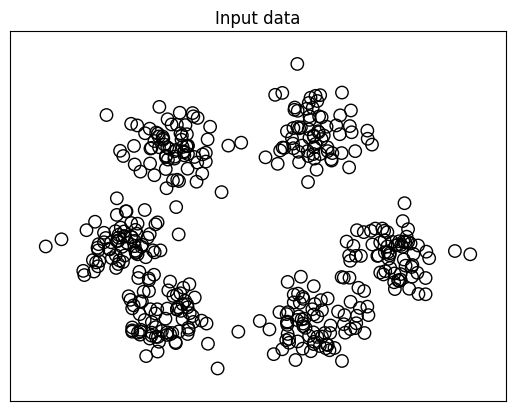

In [3]:
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Initialize variables
Initialize the variables. The ```values``` array will contain a list of values we want to iterate on
and find the optimal number of clusters:

In [4]:
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
Iterate through all the values and build a K-Means model during each iteration and estimate the silhouette score for the current clustering model using Euclidean distance metric:

In [5]:
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.47762624870454473

Number of clusters = 3
Silhouette score = 0.5471742411734871

Number of clusters = 4
Silhouette score = 0.579480188968759

Number of clusters = 5
Silhouette score = 0.5890032635647954

Number of clusters = 6
Silhouette score = 0.6096904118954452

Number of clusters = 7
Silhouette score = 0.5538191872249804

Number of clusters = 8
Silhouette score = 0.4980077486108256

Number of clusters = 9
Silhouette score = 0.48744135153979856


# Plot silhouette scores
Visualize the silhouette scores for various values:

Text(0.5, 1.0, 'Silhouette score vs number of clusters')

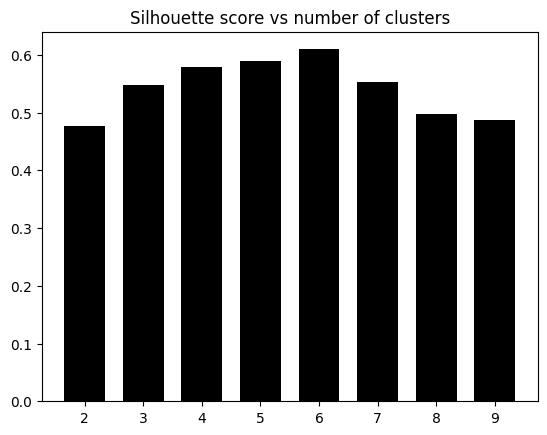

In [6]:
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
Extract the best score and the corresponding value for the number of clusters:

In [7]:
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()


Optimal number of clusters = 6
